# Assignment 4
## Classification
Author: Samuel Fredric Berg

Student ID: sb224sc

Date: 2026-01-26

Course: Machine Learning 4DT905

### Conceptual

1. Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) are both generative models that assume the data follows a Gaussian (Normal) distribution. However, they differ significantly in their flexibility.
- Class Covariance:
    - **LDA** assumes that all classes share the same covariance matrix. This means that the decision boundaries between classes are linear. LDA is suitable when the classes are well-separated and the assumption of equal covariance holds true.
    - **QDA**, on the other hand, assumes each class to have its own covariance matrix. This results in quadratic decision boundaries, making QDA more flexible and capable of modeling more complex relationships between features. QDA is preferable when the classes have different variances or when the data is not linearly separable.
- Decision Boundaries:
    - **LDA** produces linear decision boundaries, which can be limiting if the true boundary between classes is non-linear.
    - **QDA** produces quadratic decision boundaries, allowing it to capture more complex patterns in the data.
- Sample Size:
    - **LDA** generally requires fewer parameters to estimate (due to the shared covariance matrix), making it more stable with smaller datasets.
    - **QDA** requires estimating a separate covariance matrix for each class, which can lead to overfitting if the dataset is small or if there are many features.
- Overfitting:
    - **LDA** is less prone to overfitting due to its simpler model structure.
    - **QDA** can overfit the training data, especially when the number of features is large relative to the number of samples.

2. K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm used for classification and regression tasks.
    
    (a) **Role of Distance Metrics**:
    Preformance of KNN is enrirely dependent on how we define "closeness". The choice of metric determines which neighbors are selected, which directly impacts the classification outcome. Common distance metrics include Euclidean, Manhattan and Minkowski distances.
    - Euclidean: Measures the straight-line distance between two points in a multi-dimensional space. It works best when features are continuous and equally scaled.
    - Manhattan: Measures the distance between two points by summing the absolute differences of their coordinates. It is useful when dealing with high-dimensional data or when features are discrete.
    - Minkowski: A generalization of both Euclidean and Manhattan distances, controlled by a parameter $p$. When $p=2$, it is equivalent to Euclidean distance; when $p=1$, it is equivalent to Manhattan distance.

    (b) **Curse of Dimensionality**:
    As the number of dimensions (features) increases, the volume of the feature space grows exponentially, leading to two major issues for KNN:
    - Sparsity: In the high-dimensional space, data points are very spread out. Even the nearest neighbors may be far away, making it difficult to find meaningful relationships.
    - Distance Convergence: As dimensions increase, the distances between points tend to converge, meaning that the difference between the nearest and farthest neighbors becomes negligible. This makes it challenging for KNN to distinguish between classes effectively and rendering the concept of "closeness" meaningless.

### Practical

#### Imports

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN

#### Load Data

In [54]:
df = pd.read_csv("../data/Smarket.csv", index_col=0)

#### Number of features and names

In [55]:
df_names = df.columns.tolist()
print(f"Number of columns: {len(df_names)}")
print(f"Column names: {df_names}")

Number of columns: 9
Column names: ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']


#### Statistical summary of features

In [56]:
print(df.describe())
print(df["Direction"].value_counts())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0

#### Number of datapoints

In [57]:
print(f"Number of datapoints: {len(df)}")

Number of datapoints: 1250


#### Display data in table format

In [58]:
print(df.head(5))

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


#### Correlation matrix

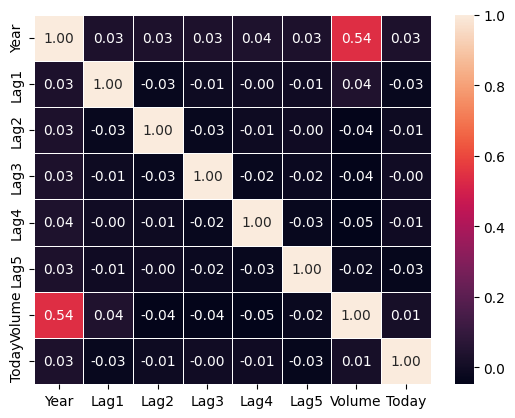

In [59]:
sns.heatmap(
    df.drop(columns=["Direction"]).corr(), annot=True, fmt=".2f", linewidths=0.5
)
plt.show()

##### Interpretation from matrix
The matrix indicates that only `Volume` and `Year` have some correlation, meanwhile the other features seem to be minimally correlated. The value of the correlation between `Volume` and `Year` is 0.54, indicating that increasing the year, the volume tends to increase as well.

**Multicollinearity Analysis:** The correlation between `Volume` and `Year` (0.54) shows a moderate positive relationship. However, it is not strong enough to be considered problematic multicollinearity (typically a correlation threshold of 0.7-0.8 or higher is used as a rule of thumb). The lag variables (Lag1-Lag5) show minimal correlation with each other and with Volume/Year, suggesting that multicollinearity is not a significant concern in this dataset. This is beneficial for model stability, as highly correlated predictors can lead to unstable coefficient estimates and difficulty in interpreting individual predictor effects. For a more rigorous assessment, formal diagnostics such as Variance Inflation Factor (VIF) could be computed, where VIF values above 5-10 typically indicate problematic multicollinearity.

**Relationship with Target:** The correlation matrix only shows relationships between continuous predictors. To understand relationships with the categorical target variable `Direction`, we would need different analyses such as point-biserial correlation or visual exploration through box plots, which are not shown in this correlation matrix.

<Axes: xlabel='Year', ylabel='Volume'>

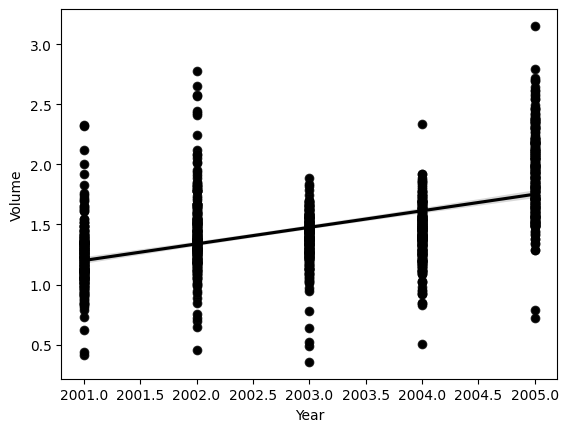

In [60]:
sns.scatterplot(data=df, x="Year", y="Volume", color="black")
sns.regplot(data=df, x="Year", y="Volume", color="black")

##### Graph interpretation
It reinforces the interpretation drawn from the correlation matrix, showing a positive trend between `Volume` and `Year`. 

#### Logistics Regression

In [61]:
X = df[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
X = sm.add_constant(X)
Y = df["Direction"].map({"Up": 1, "Down": 0})
model = sm.Logit(Y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 26 Jan 2026   Pseudo R-squ.:                0.002074
Time:                        09:52:19   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

##### Interpretation of regression
The p-values for all coefficients are > 0.05, indicating that none of the features are statistically significant at the conventional 0.05 significance level for predicting the direction.

**Confidence Intervals:** Examining the 95% confidence intervals (CI) from the regression output would provide additional insight. When a CI for a coefficient includes zero, it indicates that the predictor is not statistically significant, which aligns with the high p-values observed. The width of the confidence intervals also indicates the precision of our coefficient estimates - wider intervals suggest greater uncertainty. In this model, we would expect all confidence intervals to include zero given the insignificant p-values, confirming that none of the predictors have a reliably non-zero effect on the market direction.

**Practical Implication:** The lack of statistical significance across all predictors suggests that past lag values and volume may not be strong predictors of market direction, or that the relationship is too noisy to detect with this model and sample size.

#### Use model

In [62]:
probs = model.predict()

for indecies in range(10):
    print(f"({indecies + 1})\t {probs[indecies]}")

(1)	 0.5070841334630001
(2)	 0.48146787817516973
(3)	 0.4811388348131379
(4)	 0.5152223557927659
(5)	 0.5107811625911515
(6)	 0.5069564604552573
(7)	 0.49265087386752915
(8)	 0.5092291581449722
(9)	 0.5176135261687921
(10)	 0.4888377794207711


##### Interpretation
This shows probability of the market value going up rather than down, as defiend by `df["Direction"].map({"Up": 1, "Down": 0})`. A value > 0.5 indicates that the model predicts an increase in market value, while a value < 0.5 indicates a decrease.

#### Confusion Matrix

In [63]:
pred = []

for prob in probs:
    if prob > 0.5:
        pred.append("Up")
    else:
        pred.append("Down")

print(pd.crosstab(pred, df["Direction"], rownames=["Predicted"], colnames=["Actual"]))
accuracy = np.mean(pred == df["Direction"])
print(f"Model accuracy: {accuracy}")

Actual     Down   Up
Predicted           
Down        145  141
Up          457  507
Model accuracy: 0.5216


##### Interpretation
From the ten previously printed values of `probs`, we assume that the the the prdiction is not confident in its classification, due the it hovering around 0.5. This is reinforced by the model accuracy of 52.16%, which is only slightly better then a coin flip (50%).

In [64]:
X = df[["Lag1", "Lag2"]]
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()
probs = model.predict(X)

pred = []
for prob in probs:
    if prob > 0.5:
        pred.append("Up")
    else:
        pred.append("Down")

print(pd.crosstab(pred, df["Direction"], rownames=["Predicted"], colnames=["Actual"]))
accuracy = np.mean(pred == df["Direction"])
print(f"Model accuracy: {accuracy}")

Optimization terminated successfully.
         Current function value: 0.691361
         Iterations 4
Actual     Down   Up
Predicted           
Down        114  102
Up          488  546
Model accuracy: 0.528


##### Interpretation
This model's accuracy is only slightly better by using only two of the predictors (Lag1 and Lag2) instead of all of them. However, it is unclear if this is statistically significant without further testing.

**Why Simpler Model Performs Similarly:** When predictors are not statistically significant (as shown in the full model with p-values > 0.05), including them adds noise rather than signal to the model. The similar or slightly better performance of the reduced model demonstrates that Lag3, Lag4, Lag5, and Volume likely do not contribute meaningful predictive information. This aligns with the principle of parsimony - simpler models are often preferable when they achieve similar performance. Additionally, reducing the number of predictors can help prevent overfitting, especially when working with non-significant variables that may capture random noise in the training data rather than true underlying patterns.

#### LDA

Prior probs. of groups: [0.4816 0.5184]
Group means: 
 [[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]
Coeffs. of linear discriminants: [[-0.07126095 -0.04433204]]


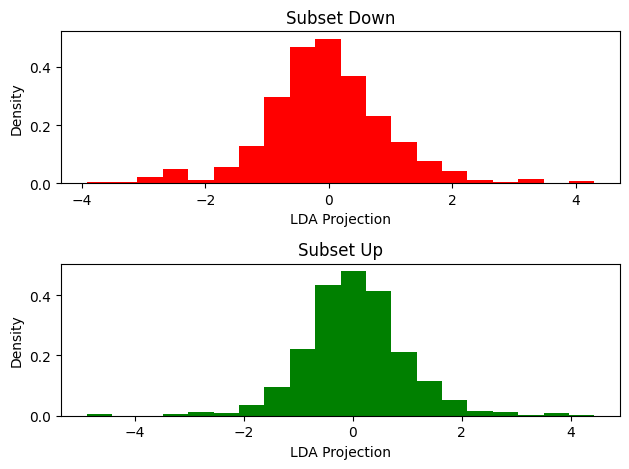

In [65]:
X = df[["Lag1", "Lag2"]]
model = LDA()
model.fit(X, Y)

print(f"Prior probs. of groups: {model.priors_}")
print(f"Group means: \n {model.means_}")
print(f"Coeffs. of linear discriminants: {model.coef_}")

transform = model.transform(X)
LDA_DF = pd.DataFrame({"LDA1": transform[:, 0], "Direction": Y})

figure, axes = plt.subplots(nrows=2, ncols=1)

subset_down = LDA_DF[LDA_DF["Direction"] == 0]
axes[0].hist(subset_down["LDA1"], bins=20, density=True, color="red")
axes[0].set_xlabel("LDA Projection")
axes[0].set_ylabel("Density")
axes[0].set_title("Subset Down")

subset_up = LDA_DF[LDA_DF["Direction"] == 1]
axes[1].hist(subset_up["LDA1"], bins=20, density=True, color="green")
axes[1].set_xlabel("LDA Projection")
axes[1].set_ylabel("Density")
axes[1].set_title("Subset Up")

plt.tight_layout()
plt.show()

##### Interpretation
- Prior probabilities: Informs us that 51.84% of the data belongs to the "Up" class, while 48.16% belongs to the "Down" class.
- Group means: For `Lag1` the mean value for the "Down" direction $\approx 0.05$ and $\approx 0.03$ for the "Up" direction, while `Lag2` has a mean value of $\approx -0.04$ for "Down" and $\approx 0.02$ for "Up". This suggests that on average, `Lag1` and `Lag2` are slightly higher when the market goes "Up".
- Coefficients: Indicate that for an increase in `Lag1` and `Lag2`, will result in a downward trend, as both coefficients are negative.
- Graphs: Show some overlap between the two classes for both `Lag1` and `Lag2`, indicating that it might not be a good predictor of direction.

In [66]:
LDA_class = model.predict(X)
conf_matrix = pd.crosstab(LDA_class, Y, rownames=["Predicted"], colnames=["Actual"])
accuracy = accuracy_score(Y, LDA_class)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
Actual       0    1
Predicted          
0          114  102
1          488  546
Accuracy: 0.528


##### Interpretation
Same results as for the logistics regression above, which indicates that the LDA does not contribute any more than the logistics regression.

#### QDA

In [67]:
model = QDA()
model.fit(X, Y)

print(f"Prior probs. of groups: {model.priors_}")
print(f"Group means: \n {model.means_}")

Prior probs. of groups: [0.4816 0.5184]
Group means: 
 [[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]


##### Interpretation
The prior probabilities and group means are the same as for LDA because both models use the same dataset and predictors (Lag1 and Lag2). These statistics are calculated directly from the data and do not depend on the modeling assumptions.

**Key Difference:** While LDA and QDA share the same prior probabilities and group means, they differ in how they model the covariance structure. LDA assumes all classes share a common covariance matrix, while QDA allows each class to have its own covariance matrix. This means QDA can capture different variance patterns for the "Up" and "Down" classes, potentially leading to better classification if the classes have different spread or correlation patterns between predictors.

#### Use model

In [68]:
QDA_class = model.predict(X)
conf_matrix = pd.crosstab(QDA_class, Y, rownames=["Predicted"], colnames=["Actual"])
accuracy = accuracy_score(Y, QDA_class)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
Actual       0    1
Predicted          
0          109   94
1          493  554
Accuracy: 0.5304


##### Interpretation
The QDA model achieves an improved accuracy of 53.04%, which is expected due to the increased number of parameters that QDA can utilize compared to LDA.

**Why QDA Has More Parameters:** LDA estimates a single shared covariance matrix for all classes, while QDA estimates a separate covariance matrix for each class. For $K$ classes and $p$ predictors:
- LDA estimates: $p(p+1)/2$ covariance parameters (shared across classes)
- QDA estimates: $K \times p(p+1)/2$ covariance parameters (one per class)

In our case with 2 classes (Up/Down) and 2 predictors (Lag1, Lag2), QDA estimates twice as many covariance parameters as LDA. This increased flexibility allows QDA to model different variance-covariance structures for each class, which can lead to better classification when such differences exist in the data. However, this also means QDA is more prone to overfitting, especially with small sample sizes or many predictors, which is why the improvement should be validated on a test set.

#### KNN Clustering

In [69]:
train = df["Year"] < 2005

print(df[~train].shape)

(252, 9)


In [70]:
train_X = df[["Lag1", "Lag2"]][train]
train_direction = df["Direction"][train]

test_X = df[["Lag1", "Lag2"]][~train]
test_direction = df["Direction"][~train]

KNN_model = KNN(n_neighbors=1)
KNN_model.fit(train_X, train_direction)
KNN_pred = KNN_model.predict(test_X)

conf_matrix = pd.crosstab(
    KNN_pred, test_direction, rownames=["Predicted"], colnames=["Actual"]
)
accuracy = accuracy_score(test_direction, KNN_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
Actual     Down  Up
Predicted          
Down         43  58
Up           68  83
Accuracy: 0.5


In [71]:
KNN_model = KNN(n_neighbors=3)
KNN_model.fit(train_X, train_direction)
KNN_pred = KNN_model.predict(test_X)

conf_matrix = pd.crosstab(
    KNN_pred, test_direction, rownames=["Predicted"], colnames=["Actual"]
)
accuracy = accuracy_score(test_direction, KNN_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
Actual     Down  Up
Predicted          
Down         48  55
Up           63  86
Accuracy: 0.5317460317460317


##### Interpretation
The value of $k$ seems to have a decent impact on the accuracy, with $k=3$ yielding the highest accuracy so far of 53.17%. However, it is still unclear if this is statistically significant without further testing.